<a href="https://colab.research.google.com/github/roshan-k-patel/APCOMP2090A-workbooks/blob/master/209a_section02_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science

## Section 2: Visualization

**Harvard University**<br/>
**Fall 2025**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader<br/>
**Preceptor**: Chris Gumb<br/>
<hr style='height:2px'>

In [ ]:
import requests
from IPython.core.display import HTML
styles = requests.get("http://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### Contents:
* A Visual Guessing Game - (5 min)
* Colors for Categories - (15 min)
* Colors for Quantities - (15 min)
* "It Doesn't Mean You Should Just Because You Can" - (15 min)
* Visualization Best Practices
* Exercise 1: Exploring the Tips Dataset - (15 min)
* Exercise 2: Exploring the Survey Dataset - (15 min)
* Bonus: Visualizing Distributions

In this section we'll discuss some general visualization principles and best practices.\
We'll then move on to examine some common issues students have been having with a special focus on the visualization components.

In [ ]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Humans are visual creatures. But in a strong sense _we see with our brains, not with our eyes_.\
Over 50% the cortex is implicated in the processing of visual information[[1]](https://www.rochester.edu/pr/Review/V74N4/0402_brainscience.html).\
Insights from [cognitive science](https://en.wikipedia.org/wiki/Cognitive_science) and [psychophysics](https://en.wikipedia.org/wiki/Psychophysics) into how visual stimuli are processed by the brain and turned into perceptions should be used to inform our visualization decisions.

Let's play a little guessing game to test and verify some of these insights.

## Visual Guessing Game 🎲

In [ ]:
!curl -L "https://drive.google.com/uc?export=download&id=1slX2LBjTKo2kG1dyTJ-E2Cy_-AwlFpWf" -o /content/section_2_helper_data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 39151  100 39151    0     0  28966      0  0:00:01  0:00:01 --:--:-- 1318k


In [ ]:
!unzip -o /content/section_2_helper_data.zip -d /content/

Archive:  /content/section_2_helper_data.zip
   creating: /content/data/
  inflating: /content/__MACOSX/._data  
  inflating: /content/data/cs1090a_survey.csv  
  inflating: /content/__MACOSX/data/._cs1090a_survey.csv  
  inflating: /content/data/wines.csv  
  inflating: /content/__MACOSX/data/._wines.csv  
  inflating: /content/helper.py      
  inflating: /content/__MACOSX/._helper.py  


In [ ]:
from helper import *

We'll look at two quantitative values in a single viz. Where the second is some multiple of the first.\
The possible multiples are: [2, 2.5, 3, 3.5, 4, 4.5, 5]\
The rub (the difficulty) is that **these quantities will be encoded by different visual properties**.

The quantities will be randomly generated.

**Be sure you are voting on the images being presented to the entire class! Any ones you create by running the cells in your own notebook will be different.**

**Length**

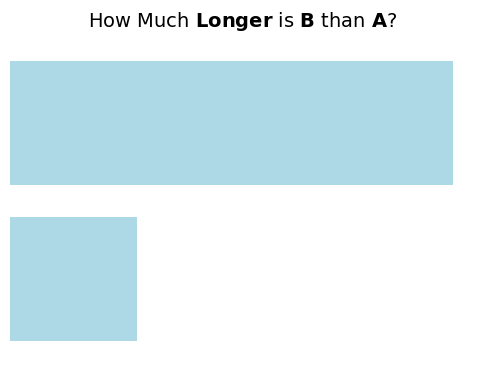

In [ ]:
scaler1 = guess_length()

In [ ]:
# choices are 2, 2.5, 3, 3.5, 4, 4.5, or 5
ANSWER_1 = 3.5

In [ ]:
test_answer(ANSWER_1, scaler1)

Correct! 3.5x 🏆


**Slope / Angle**

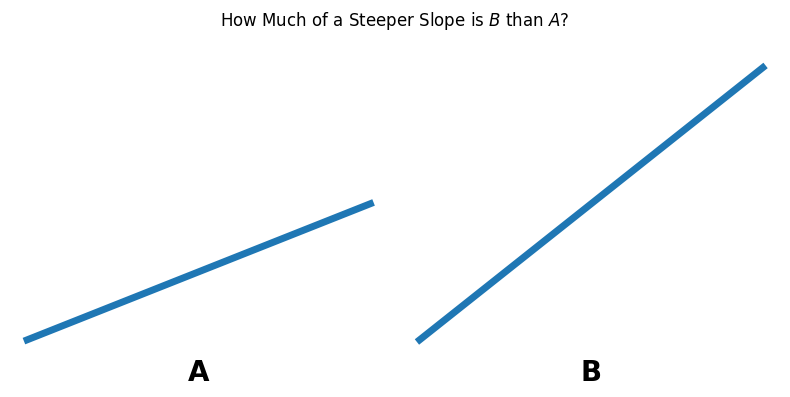

In [ ]:
scaler2 = guess_slope()

In [ ]:
ANSWER_2 = ...

In [ ]:
test_answer(ANSWER_2, scaler2)

Oops! The correct answer is: 2x 😵


**Area**

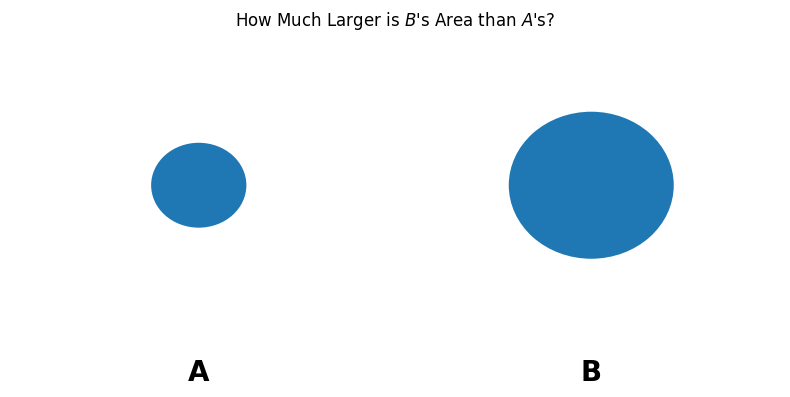

In [ ]:
scaler3 = guess_area()

In [ ]:
ANSWER_3 = ...

In [ ]:
test_answer(ANSWER_3, scaler3)

Oops! The correct answer is: 3x 😵


**Shading**

You may have seen a dramatic example of this kind of difficulty in images like this one:

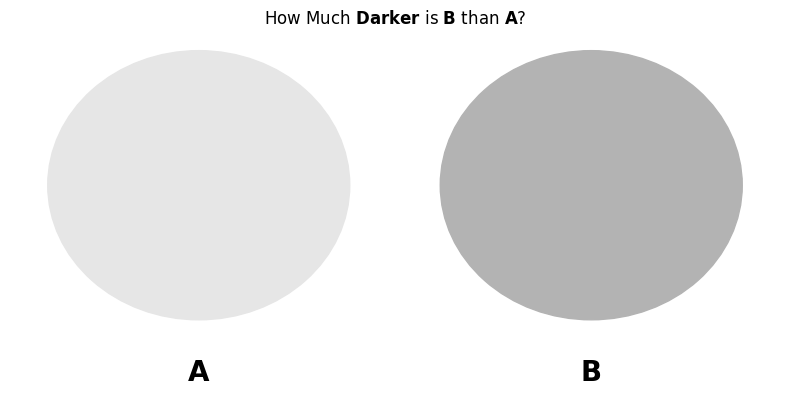

In [ ]:
scaler4 = guess_darkness()

How much darker is A than B here? If you have any doubts, you can use a [color picker](https://chrome.google.com/webstore/detail/colorpick-eyedropper/ohcpnigalekghcmgcdcenkpelffpdolg) to checker.

In [ ]:
ANSWER_4 = ...

In [ ]:
test_answer(ANSWER_4, scaler4)

Oops! The correct answer is: 3x 😵


<div>
    <img src='attachment:d4ee29ec-fb0f-454b-849b-69ae766985ea.png' width=350>
</div>

**Color**

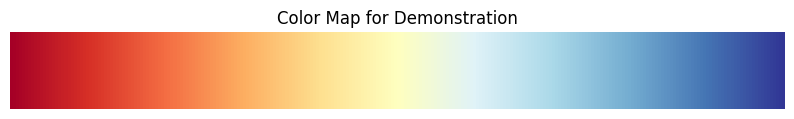

In [ ]:
show_color_gradient()

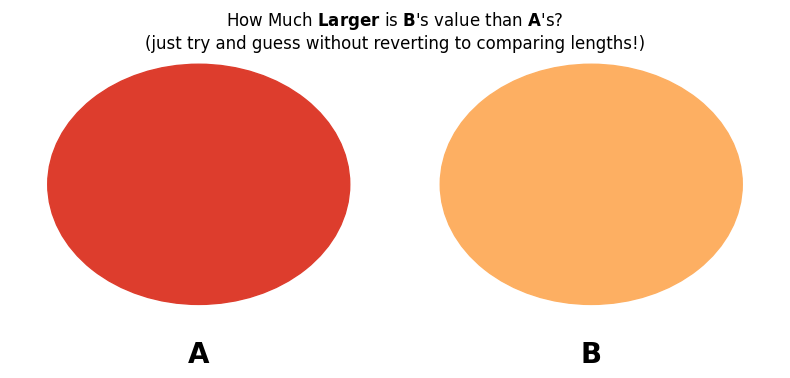

In [ ]:
scaler5 = guess_hue()

In [ ]:
ANSWER_5 = ...

In [ ]:
test_answer(ANSWER_5, scaler5)

Oops! The correct answer is: 2.5x 😵


**Takeaway**\:
- **If you cannot quantify the relations between cetrain properties (e.g. color) then don't use it to encode quantities.**

<div>
    <img src='attachment:d35c798b-4130-41f1-bbdd-367a9464776c.png' width=450>
    </div>

## Colors for Categories
As a general rule, do not use more than 5 colors at once.\
Combining each color marker with a _unique_ shape can help.

To explore this topic of colors for categories, well use the `car_crashes` dataset in `seaborn` because it has a categorical variable that takes on a large number of values. Namely, state abbreviation (`abbrev`).

This dataset was used by [FiveThirtyEight](https://projects.fivethirtyeight.com/polls/) for their article, [Dear Mona, Which State Has The Worst Drivers?](https://fivethirtyeight.com/features/which-state-has-the-worst-drivers/) You can find more info on the various features in the dataset on [Kaggle](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset).

Note: You can check out [this Github repo](https://github.com/mwaskom/seaborn-data) to see what other example datasets are accessible via Seaborn's `load_dataset` function.

In [ ]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


First, a quick plot of the total number of drivers involved in fatal car crashes per billion miles driven by state.\
(We'll keep it sorted by state name so it's easier to find a specific state)

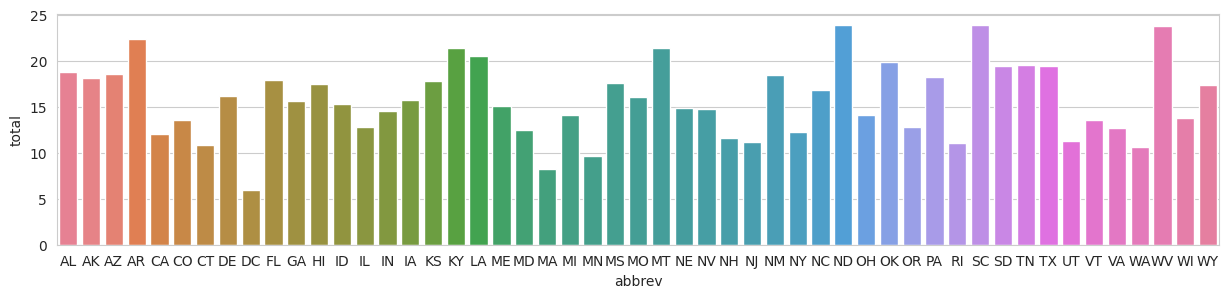

In [ ]:
# set the figure dimensions
plt.figure(figsize=(15,3))
# create plot within a style context


# check what happens when you uncomment the row below
with sns.axes_style('whitegrid'):
#with sns.axes_style('darkgrid'):
    sns.barplot(data=car_crashes, x='abbrev', y='total',
                hue='abbrev'
                );

Why the rainbow colors?🌈\
This is a rather annoying default behaviour in `seaborn`. There are far too many colors to be able to identify a state from the color alone. And besides, we are already encoding state with position on the $x$-axis! The rainbow colors may be pleasing to the eye, but they are simply a distraction.

This is an important principle of visualization: **be parsimonious.** If you are adding something to a plot that doesn't directly contribute to communicating your ideas then you are blunting the effect of your visualization.

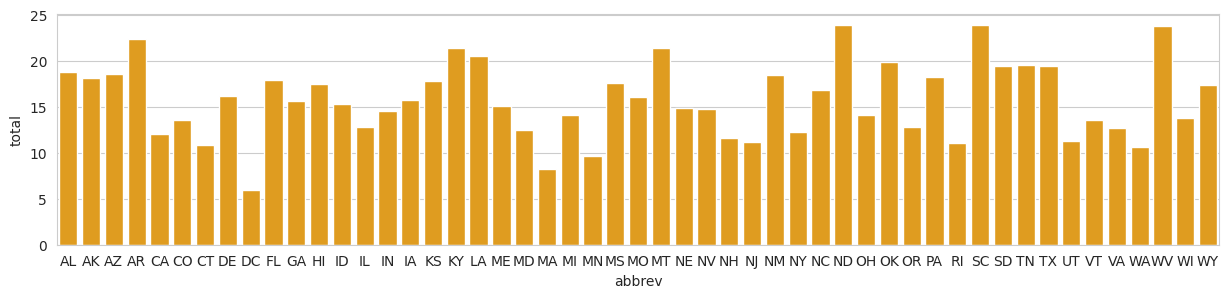

In [ ]:
plt.figure(figsize=(15,3))
with sns.axes_style('whitegrid'):
    sns.barplot(data=car_crashes, x='abbrev', y='total',
                color='orange',
                #color='purple',
              );

That's a little less distracting, wouldn't you say?

**But what about max and min values?**

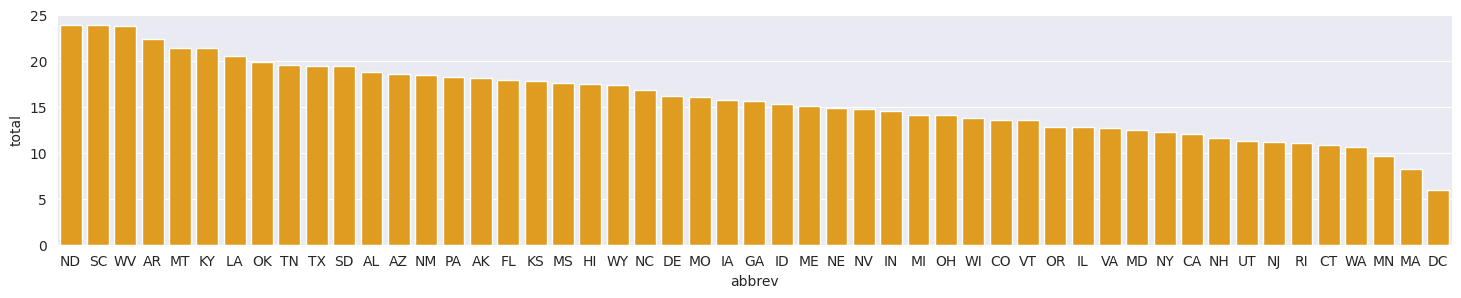

In [ ]:
car_crashes_sorted = car_crashes.sort_values(by='total', ascending=False)

plt.figure(figsize=(18,3))
with sns.axes_style('darkgrid'):
    sns.barplot(data=car_crashes_sorted, x='abbrev', y='total', color='orange')

In the rainbow bar plot above, color isn't doing any work for us as **position** is already encoding the state. Let's look at some **scatter plots** below where we explore the relationship between:
* % drivers involved in fatal car crashes who were `speeding`
* % drivers involved in fatal car crashes who were under the influence of `alcohol`
* the state in which the crash occurred

These scatter plots will give us a chance to put color (and shape) to work for us encoding state because the $x$ and $y$ position will be used to encode `speeding` and `alcohol` respectively.\
But with so many states, we should probably limit our scope of investigation. So we'll look at the 12 most densly populated states (and Washington D.C.).

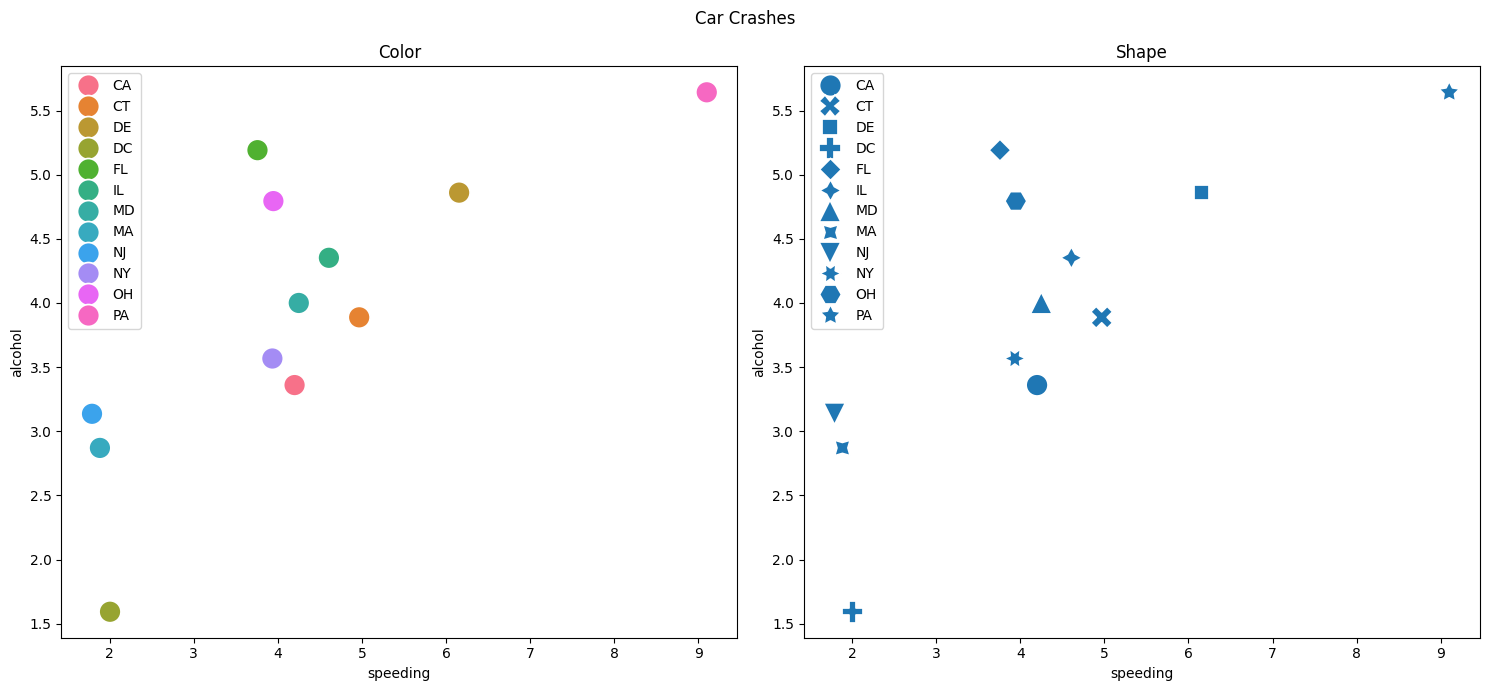

In [ ]:
dozen_most_dense = ['DC','NJ','MA','CT','MD','DE','NY','FL','PA','OH','CA','IL']
mask = car_crashes.abbrev.isin(dozen_most_dense)

fig, axs = plt.subplots(1,2, figsize=(15,7))
# notice the use of the `hue` and `style` parameters
sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol', hue='abbrev', s=250, ax=axs[0]).set_title('Color')
sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol', style='abbrev', s=250, ax=axs[1]).set_title('Shape')
for ax in axs:
    ax.legend(markerscale=1)
plt.suptitle('Car Crashes')
plt.tight_layout();

And you can use both hue and style to both encode the state.

Text(0.5, 1.0, 'Color & Shape')

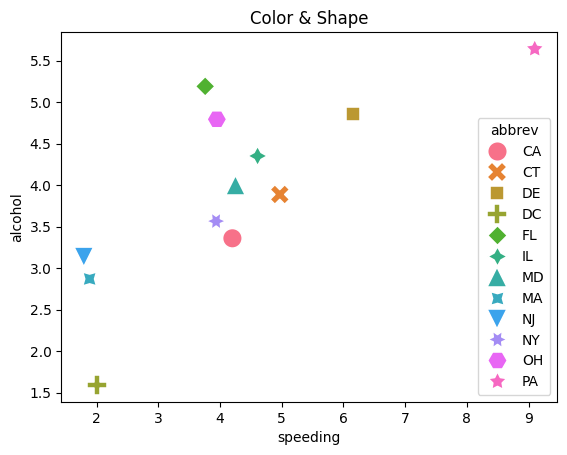

In [ ]:
sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol',
                #check what happens when we uncomment each of these:
                hue='abbrev',
                style='abbrev',
                s=200).set_title('Color & Shape')

We can bend our rule about each property of the image encoding one and only one type of information a little here. When we have so many categories, it is hard to distinguish on color alone (notice how similar IL, MD, and MA are). Shape is always an option for encoding categories, but it doesn't "jump out" at us like color does. By combinging the two we are able to make a noticeable improvement in the readability of our scatter plot.

But 12 categories is still really pushing it. You have to do a lot of back and forth consulting of the legend. If we restrict our investigaton to New England we see out result is much easier to take in at a glance.

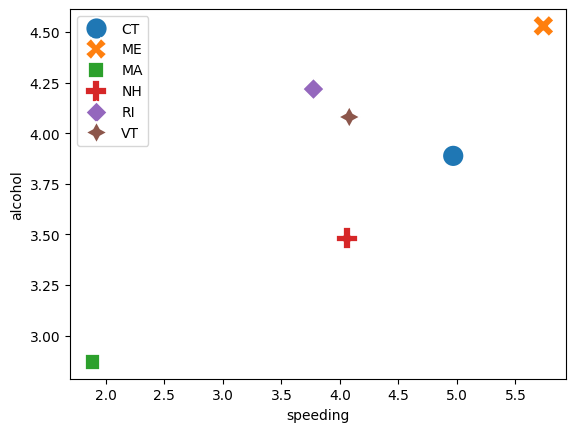

In [ ]:
new_england = ['MA','NH','ME','CT','VT','RI']
mask = car_crashes.abbrev.isin(new_england)

sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol', hue='abbrev', style='abbrev', s=250);
plt.legend(markerscale=1);

Here there is very little ambiguity as to which category is which, even with 6 different values.

**Q:** But do we *really* need to be using color or shape here at all? What else might we do to help the viewer identify the state corresponding to each data point?

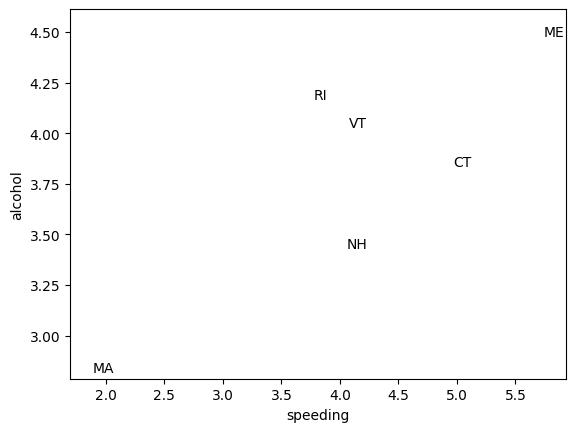

In [ ]:
mask = car_crashes.abbrev.isin(new_england)
ax = sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol', s=0, color = "orange")

for abbrev in new_england:
    pos = car_crashes.loc[car_crashes.abbrev == abbrev, ["speeding", "alcohol"]].values[0]
    #check what happens when you uncomment each of these and try to find the optimal position for the abbreviations
    #ax.annotate(abbrev, pos)
    #ax.annotate(abbrev, pos+np.array([0,0.05]))
    ax.annotate(abbrev, pos+np.array([0,-0.05]))

## Colors for Quantities

Color can also be used to encode numerical values, continuous or discrete.\
This works best when the viewer doesn't need to compute the exact differences between values, but just get a sense of roughly where they stand relative to one another.

The [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) is one of the most popular ways of using color to encode continuous (and sometimes discrete) quantities.

Here we use the **flights** as our example. ✈️

In [ ]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights.dtypes

,0
year,int64
month,category
passengers,int64


We'll look at how the number of flights over time using different `matplotlib` **colormaps**.

In [ ]:
flights_table = flights.pivot_table("passengers", "year", "month")
flights_table

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,191.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,274.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,306.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,347.0,305.0,336.0


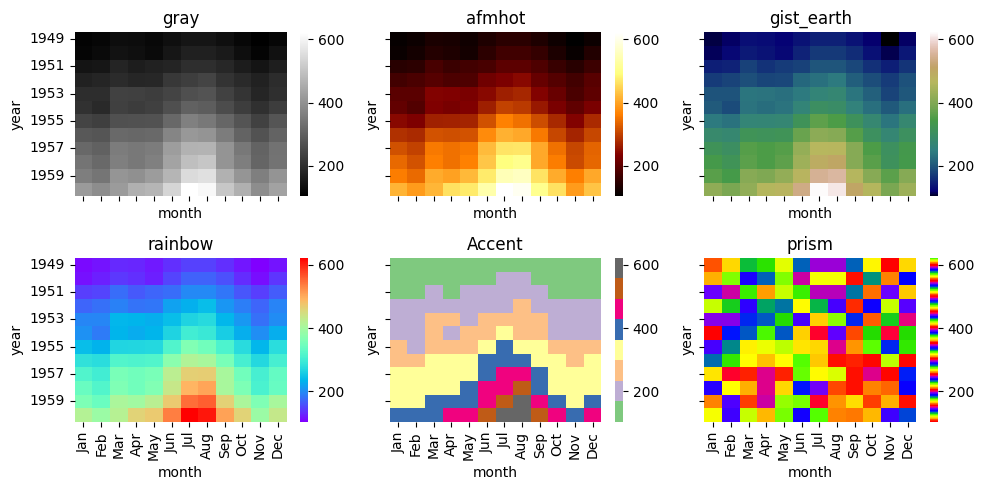

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(10, 5), sharex=True, sharey=True)

all_cmaps = list(matplotlib.cm.__dict__['datad'].keys())

#change this to True to check out random colormaps
FEELING_LUCKY = False
if FEELING_LUCKY:
    cmaps = np.random.choice(all_cmaps, size=np.prod(axs.shape), replace=False)
else:
    cmaps = ['gray', 'afmhot', 'gist_earth', 'rainbow', 'Accent', 'prism']

for ax, cmap in zip(axs.ravel(), cmaps):
    sns.heatmap(flights_table, cmap=cmap, ax=ax).set(title=cmap)
plt.tight_layout()

We can see the number of flights have been increasing each year with the bulk centered around July and August.\
Of course, not all the colormaps above are suitable for continuoys values. You can never go wrong with **gray** scale. The color gradiant on **afmhot** and **gist_earth** are interpretable with the latter perhaps veering into aesthetics-over-information territory.

**Rainbow** really should never be used for this purpose. **Accent** maybe be useful for discrete values, but we lose a lot of information here on our continuous data. And the strange **prism** colormap, with its repeating pattern is not appropriate here.

You can see a random set of colormaps by setting `FEELING_LUCKY` to `True` and re-running the cell.

`matplotlib`'s documentation has a [colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html) and a helpful page on [choosing colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html), but exploring them ourselves within a Jupyter notebook is very easy. You can simply use tab autocomplete after `matplotlib.cm` to see all of your options.

Calling `display()` on a colormap object will show us a nice color gradiant bar!\
In fact, we don't even have to explicitly call `display()` on the object. The return value of the last line of any cell is displayed by default.\
_(This is also why you sometimes get pesky text above your plots. You can surpress this output by appending `;` to the last line of your cell)_

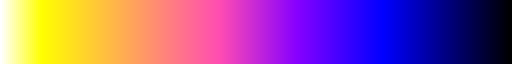

In [ ]:
matplotlib.cm.gnuplot2_r

In [ ]:
#add a dot below and look at all the colormap options
matplotlib.cm

<module 'matplotlib.cm' from '/usr/local/lib/python3.12/dist-packages/matplotlib/cm.py'>

You can also do something similar with `seaborn`, though it requires you to know the name of the colormap (no tab autocomplete for exploring).

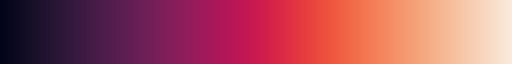

In [ ]:
sns.color_palette("rocket", as_cmap=True)

The same principles regarding colormaps for quantitative values hold when plotting density functions with something like  [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In [ ]:
# generate some data
x = np.random.uniform(size=100)
y = np.random.uniform(size=100)

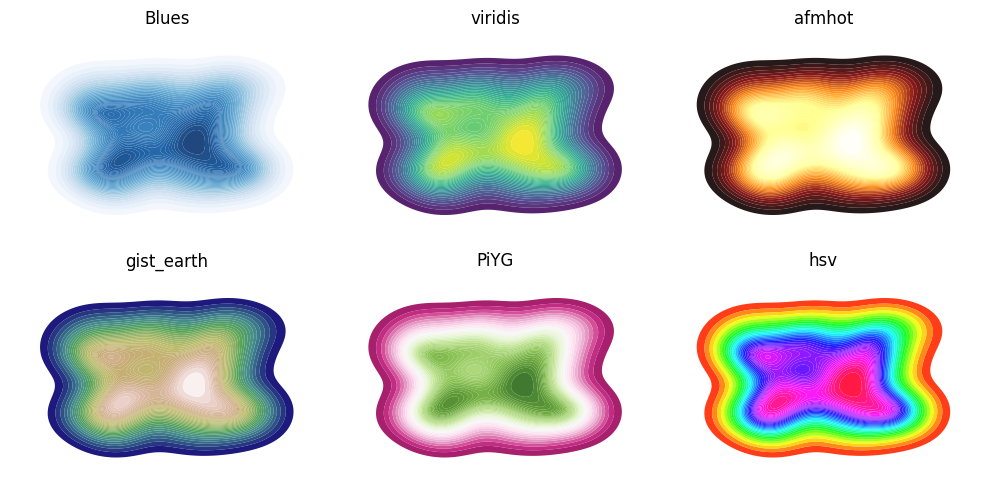

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(10, 5), sharex=True, sharey=True)

#change this to True to check out random colormaps
FEELING_LUCKY = False
if FEELING_LUCKY:
    cmaps = np.random.choice(all_cmaps, size=np.prod(axs.shape), replace=False)
else:
    cmaps = ['Blues', 'viridis', 'afmhot', 'gist_earth', 'PiYG', 'hsv']

for ax, cmap in zip(axs.ravel(), cmaps):
    sns.kdeplot(x=x, y=y, ax=ax,
                cmap=cmap,
                fill=True,
                thresh=0.025,
                antialiased=True,
                alpha=0.9,
                n_levels=40).set(title=cmap)
    sns.despine(left=True, bottom=True)
    hide_ticks(ax)
plt.tight_layout()

**Color-blindness**\
[According to the National Institutes of Health](https://ghr.nlm.nih.gov/condition/color-vision-deficiency#statistics), around 1 in 12 males and 1 in 200 females have some form of color vision deficiency.
* Don't use red and green as contrasting colors (this is the most common form of color-blindness)
* Seek out colormaps and palletes designed to be color-blind friendly
* View your visualizations under color-blindness simulations

Resources:
* [Color-blind Friendly Diagrams](https://yoshke.org/blog/essays/2020/07/colorblind-friendly-diagrams/) (short article)
* [CBcolors.py](https://gist.github.com/thriveth/8560036#file-cbcolors-py) (just one color-blind friendly pallette for plotting)
* [Coblis - Color Blindness Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) (upload your own images and simulate various color vision deficiencies)

## It Doesn't Mean You Should Just Because You Can 🐧❗

Often, our first impulse is to represent _as much information as possible_ in our visualization. We spend a lot of time coming up with clever ways to encode each feature in the dataset into a single plot.

But this is counterproductive. We want to draw attention to some interesting aspect of the data: a strong relationship, an unexpected pattern, etc. These important insights can be overlooked if there is too much going on in a visualization.

Let's look at an example using `seaborn`'s penguins dataset (a worthy successor to the connonical iris dataset.)

In [ ]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We have 3 species of penguins living across 3 different islands. There are measurements of bill length, bill depth, flipper length, and body mass. We also have categorcial variable for each penguin's sex giving us a total of 7 features.

Imagine your colleague were to present you with the plot below.

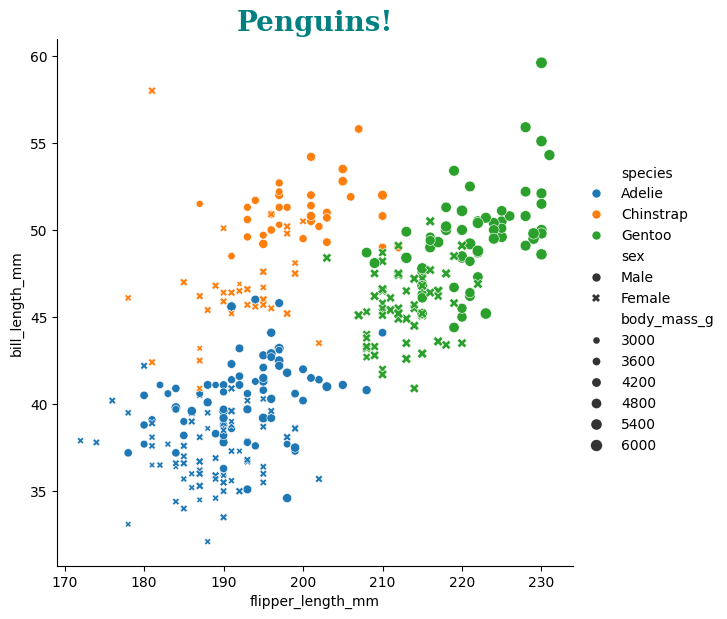

In [ ]:
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
            hue='species', style='sex', size='body_mass_g', height=6);
plt.title('Penguins!', fontdict={'color': 'teal', 'size': 20, 'weight': 'bold', 'family': 'serif'});

Q: Why is this plot bad?

Here they've managed to encode `species`, `bill_length_mm`, `flipper_length_mm`, `body_mass_g`, and `sex` all in a single `seaborn` call. That's 5 of our original 7 predictors. And they assure you they're working on a way to encode `bill_depth_mm` with a marker's alpha value and encode `island` by giving each marker a different border color.

But was it really worth it? We need to ask ourselves, "what am I trying to communicate with this plot?"\
If we don't have a clear answer then that is a sign to re-evaluate our current approach.

How about this next example using the **exercise** dataset? 🏃🚶🧘

In [ ]:
exercise = sns.load_dataset('exercise').drop('Unnamed: 0', axis=1)
exercise.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


Here we have the pulse measurements from individuals on either a 'low fat' or 'no fat' diet as they engage in sitting, walking, or running for different periods of time. Once again, your ambitious colleague boasts they have captured, "all the information in a single visualization," and presents you with the plot below.

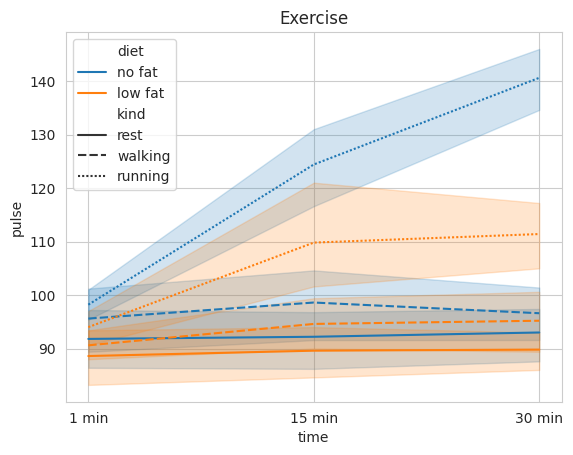

In [ ]:
with sns.axes_style('whitegrid'):
    sns.lineplot(data=exercise, x='time', y='pulse', hue='diet', style='kind', estimator='mean')\
    .set_title('Exercise')

Yikes! 🤯\
While it's true we've managed to cram pretty much all the information from the dataframe into our plot, the result is a mess. And the grid lines here only make things more cluttered.

One thing would could try is splitting up the information into multiple plots so as not to overwhelm the viewer.

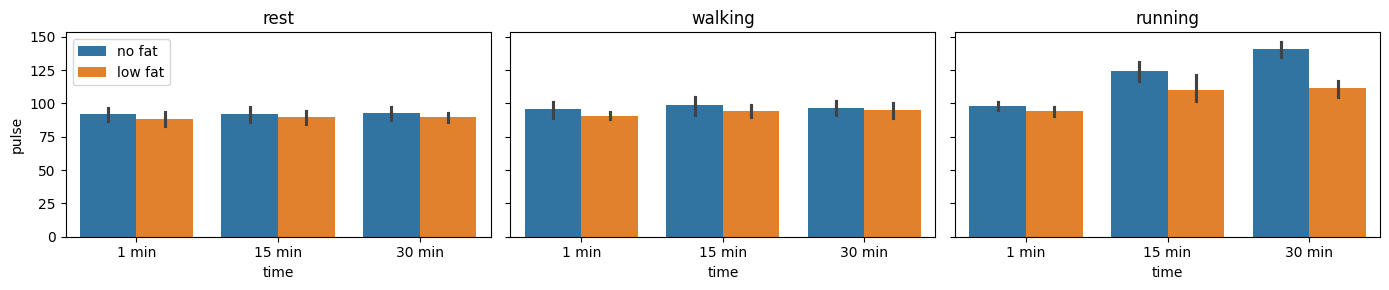

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(14,3), sharey=True)
for i, kind in enumerate(exercise.kind.unique()):
    mask = exercise.kind == kind
    sns.barplot(data=exercise[mask], x='time', y='pulse', hue='diet', ax=axs[i]).set_title(kind)
axs[0].legend(loc='upper left')
axs[1].get_legend().remove()
axs[2].get_legend().remove()
plt.tight_layout()

Ok, we've split up the different types of exercises. But what is the viewer really supposed to take away from this set of plots? We are still trying to do everything at one. We'd do well to focus in where we think the real story is.

There is very little difference between the diet groups when resting or walking. Let's instead focus on running.

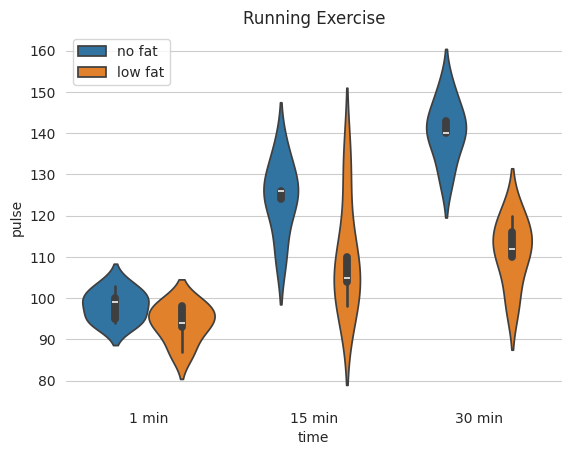

In [ ]:
mask = exercise.kind == 'running'
with sns.axes_style('whitegrid'):
    ax= sns.violinplot(data=exercise[mask], x='time', y='pulse', hue='diet')
    ax.legend(loc='upper left');
    ax.set_title('Running Exercise');
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

By zooming in, not only have we reduced the cognitive load on the viewer by reducing the number of components they need to process, but we are also able to see more granular information about the segment of the data we are interested in. Using the violin plots here allows us to consider the distributions more easily than with the bar plots which just showed us the means and tiny standard deviation bars.

Here's one curious fact that reveals itself in this new visualization: at 15 minutes, the 'low fat' group still has individuals will pulses as high as those in the 'no fat' group (some even higher), topping off at just over 150. _But_ after 30 minutes, there are _no_ 'low fat' runners with pulse much greater about 130. By contrast, the 'no fat' group's distribution reaches new heights at the 30 minute mark. Perhaps the 'low fat' runners are better able to acclimate to the strain of running after a sufficient amount of time and their cardiovascular system doesn't have to work quite as hard.

## Visualization Best Practices 🥇

* Reduce 'ink'-to-information ratio
* Follow the heirarchy of visual efficiency (MOST position -> length -> angle -> area -> intensity -> color LEAST)
* Ask, "what information is this property of the plot encoding?"
* Don't sacrifice your ability to communicate insights for eye-candy!
* Ask, "what insight am I trying to communicate with this plot?"
* Use accessible colormaps and pallettes
* Don't try to say everything in a single plot
* Often less really is more
* Just say no to rainbow colormaps and pie charts 🚫🌈 🚫🥧

**When do I use `seaborn` rather than `matplotlib`?**

`seaborn` is most useful when your data is already in a DataFrame. This allows variables to be selected using their column names. Simply pass the df as the `data` argument to the `seaborn` plotting method and pass column names for the other arguments like `x`, `y`, `hue`, etc. The method calls are very readable and you get axis labels and legends 'for free.'

`matplotlib` is best when ploting `numpy` ndarrays. Here you there are no existing column names for `seaborn` to take advantage of. This is why you see `matplotlib` used in the PCA examples below: PCA's `transform` method and `explained_variance_ratio_` attribute return `numpy` ndarrays, not a DataFrames.

Resources:
* [Seaborn Aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

<div class="alert alert-success">
    <strong>🏋🏻‍♂️ CLASS ACTIVITY:</strong> Explore the Tips Dataset 💸  Share your Viz! 🎁</div>  

Here is yet another interesting dataset that comes with `seaborn`.\
It contains information about tips, the setting in which they were left, and the individuals who left them.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Using the principles and methods covered above, create a visualization or set of visualizations to:
1. **Investigate a _specific_ question about the dataset**
2. **Communicate a _specific_ insight about the dataset**

Here are a few examples:
*   What is the average tip percentage for each day of the week?
*   How does the average total bill differ between lunch and dinner?
*   Do smokers tend to tip differently compared to non-smokers?
*   What is the relationship between group size and average tip percentage?
*   Are there differences in tipping behavior between men and women?
*   On which day of the week are the highest total bills recorded?
*   Does the size of the dining party affect the variability of tips?
*   What proportion of customers are smokers vs. non-smokers?
*   What is the correlation between the total bill and the tip amount?



In [ ]:
# this is some starter code you might find useful to begin you rown visualizations
sns.barplot(data=tips)
# your code here

Finally, please **share your work with the class** (disasters are also welcome!)\
Post your visualization on YOUR SECTION'S THREAD on this [Ed forum](https://edstem.org/us/courses/83082/discussion).

You can either:
1. take a screenshot of your plot(s) [Screenshots on Mac](https://support.apple.com/en-us/HT201361)
2. use `plt.savefig('my_cool_viz.png')` in the cell with the plot(s) to save it to disk

Then upload your image to the post including:\
**(1)** The question you were asking of the data and/or **(2)** the insight you are trying to communicate with your plot.

You can always make your posts anonymously if you like 🥷

<div class="alert alert-success">
    <strong>🏋🏻‍♂️ BONUS CLASS ACTIVITY (time permitting):</strong> Explore the CS109A class survey data!</div>  

Example questions:
- What is the distribution of students’ ages in the class?
- How many languages (spoken) do students typically know?
- Which programs of study are most represented in this class?
- How much Python experience do students have, and how does it vary across programs?
- What is the distribution of Pandas skill levels in the class?
- Do students who report more Python experience also report higher Pandas skills?
- What are the most common operating systems (OS) used by students?
- Do students who prefer dark mode differ in their programming experience compared to light mode users?
- What development environments (env) do students use most frequently?
- At what times do students typically wake up and how much sleep do they get?
- Is there a correlation between sleep hours and age?
- What are the most common hobbies among students?
- What genres of movies are most popular?


In [ ]:
import pandas as pd
!curl -L "bit.ly/cs1090a-data" -o /content/data.zip
!yes | unzip /content/data.zip -d /content

# this is some starter code you might find useful to begin your own visualizations
survey_data = pd.read_csv('data/cs1090a_survey_clean.csv', index_col=0)
survey_data.head()
# your code here

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0   1349      0 --:--:-- --:--:-- --:--:--  1356
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 48339  100 48339    0     0  30844      0  0:00:01  0:00:01 --:--:-- 39883
Archive:  /content/data.zip
  inflating: /content/data/cs1090a_survey_raw.csv  
replace /content/data/cs1090a_survey.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /content/data/cs1090a_survey.csv  
  inflating: /content/data/survey_clean.csv  
  inflating: /content/data/cs1090a_survey_clean.csv  
   creating: /content/data/.ipynb_checkpoints/


,program,jupyter,python_exp,pandas_skill,os,dark_mode,languages,continents,dob,wake_time,sleep_time,fav_season,caffeine,pet,fav_movie,fav_genres,hobbies,hw0
timestamp,,,,,,,,,,,,,,,,,,
2025-09-09 17:43:09,bachelor's (cs),True,less than 1 year,2,macos,False,english,"africa, asia, europe, north america, south ame...",2004-11-15,1900-01-01 10:00:00,1900-01-01 00:00:00,spring,tea,pet rock,NaN,comedy,"tennis, movies, eating",NaN
2025-09-09 17:44:15,bachelor's (statistics),True,1-2 years,1,macos,True,english,north america,2004-10-21,1900-01-01 09:00:00,1900-01-01 01:00:00,fall,coffee,pet cat,NaN,"action, comedy, sci-fi, mystery/thriller",NaN,NaN
2025-09-09 17:44:16,master's (ds),True,4+ years,5,macos,True,NaN,"asia, australia, europe, north america",2003-02-22,1900-01-01 11:00:00,1900-01-01 01:00:00,winter,coffee,pet cat,NaN,NaN,NaN,NaN
2025-09-09 17:44:32,bachelor's (am),True,2-4 years,4,macos,True,english,"europe, north america, south america",2004-09-23,1900-01-01 07:25:00,1900-01-01 00:00:00,summer,no caffeine for me!,pet cat,shawshank redemption,"action, comedy, sci-fi","hiking, running, reading",NaN
2025-09-09 17:44:38,bachelor's (chemistry),True,1-2 years,4,macos,True,"english, spanish",north america,2004-06-14,1900-01-01 08:45:00,1900-01-01 00:00:00,winter,no caffeine for me!,pet cat,bee movie,"sci-fi, fantasy","playing cello, basketball, playing minecraft",NaN


Again, please **share your work with the class** (disasters are also welcome!)\
Post your visualization on YOUR SECTION'S THREAD on this [Ed forum](https://edstem.org/us/courses/83082/discussion).

You can either:
1. take a screenshot of your plot(s) [Screenshots on Mac](https://support.apple.com/en-us/HT201361)
2. use `plt.savefig('my_cool_viz.png')` in the cell with the plot(s) to save it to disk

Then upload your image to the post including:\
**(1)** The question you were asking of the data and/or **(2)** the insight you are trying to communicate with your plot.

You can always make your posts anonymously if you like 🥷

## Reviewing Common Visualization Issues **(OPTIONAL BUT HELPFUL)**

### Wine Dataset 🍷

For the next example we'll use the **wines** dataset. Each row contains information about the objective chemical properties of the wine as well as a concensus quality rating.

In [ ]:
wines = pd.read_csv('data/wines.csv', index_col=0)
wines.head()

### Comparing Distributions

**Suppose you ask someone, "investivate the distribution of alcohol content in wines of each quality rating," and they produce this plot.**

In [ ]:
ax = wines.groupby('quality')\
    .agg({'alcohol': 'mean'})\
    .plot.bar(legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('avg alcohol content');

**🤔 Q: List at least _3 problems_ with this plot.**

`seaborn` allows us to produce a very similar plot with some stdev bars and colors (whether this is an improvement is debateable). But many of the same issues remain.

In [ ]:
ax = sns.barplot(data=wines, x='quality', y='alcohol', estimator=np.mean)
ax.set_title('Wines');

Ideally, we want to display more information about these distributions then just their mean.\
There are several options. Histograms (which `seaborn` calls [histplots](https://seaborn.pydata.org/generated/seaborn.histplot.html)) make a very good default/first choice for EDA.

But trying to plot too many distributions on top of one another will result in an incomprehensible mess. Grouping categories or ploting only a subset can make all the difference between an informative visualization and a useless one.

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
sns.histplot(data=wines, x='alcohol', hue='quality', alpha=0.5, ax=axs[0]).set_title('All Qualities')
wines_binary = wines.copy()
wines_binary['quality_binary'] = np.where(wines_binary.quality > 5, 'good', 'bad')
sns.histplot(data=wines_binary, x='alcohol', hue='quality_binary', alpha=0.5, ax=axs[1]).set_title('Good/Bad Binary')
sns.histplot(data=wines_binary, x='alcohol', hue='quality_binary',
             kde=True, alpha=0.5, fill=False, ax=axs[2]).set_title('KDE /w No Fill')
plt.suptitle('Wines')
plt.tight_layout();

If you are intent on comparing more than 2 or 3 distributions then [boxplot]() would probably the next thing to try. Another benefit they have overhistograms is the ability to clearly display outliers (or 'fliers'). But displaying outliers can squash the distributions. So it is important to know how to toggle them off when we need to.

In [ ]:
# create an extreme outlier as a demonstration
new_obs = wines.iloc[-1].copy()
new_obs['alcohol'] += 10
wines_outlier = pd.concat([wines.copy(), new_obs.to_frame().T])

# for some reason the above steps changed `quality` to a float
wines_outlier['quality'] = wines_outlier.quality.astype(int)

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
sns.boxplot(data=wines, x='quality', y='alcohol', ax=axs[0]).set_title('Original')
sns.boxplot(data=wines_outlier, x='quality', y='alcohol', ax=axs[1]).set_title('/w Extreme Outlier')
sns.boxplot(data=wines_outlier, x='quality', y='alcohol', showfliers=False, ax=axs[2]).set_title('No Outliers')
plt.suptitle('Wines (Boxplots)');

A related issue to the distribution squashing effect of the extreme outlier above: be careful about plotting on a **log scale**. It is not always warrented and can also flatten what might otherwise be obvious differences between distributions.

The [boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html) is a nice alternative to the box plot that provides a bit more information about the other quantiles. The [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) is like a mix between a scatter plot and a violin plot.

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,4))
sns.boxenplot(data=wines, x='quality', y='alcohol', ax=axs[0]);
sns.swarmplot(data=wines.sample(frac=.5), x='quality', y='alcohol', ax=axs[1], s=2.5);

`swarmplot` can be finicky. It will throw warnings and only plot a subset of the data if there isn't enough space. I've taken a sample here and decreased the marker size to avoid the warning.

**Q:** 🤔 If we wanted to be careful, what should we ensure about the sample we are plotting?

[stripplot]() is a nice alternative to `swarmplot` that won't complain about the number of points. [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) is similar but has the quirk of being a 'figure-level' function. And so does not accept target axes as arguments.

The violinplot is another popular choice.

In our example, the numerical value of `quantity` is easily interpreted by the plot. But for many non-ordinal categorical variables that have been numerically encoded this is not the case (think of the dietary restrictions or cities in HW2). In these cases we always want to change the labels for the categories into something that the viewer can interpret directly. To demonstrate this we've made some string labels for each category and added them to the plot using `ax.set_ticklabels()` .

In [ ]:
quality_names = ['Blech!', 'Eww', 'Meh', 'Hmm..', 'Yum', 'Wow!']
fig, axs = plt.subplots(1,2, figsize=(14,4))
sns.stripplot(data=wines, x='quality', y='alcohol', alpha=0.5, ax=axs[0]).set_title('Strip Plot')
ax = sns.violinplot(data=wines, x='quality', y='alcohol', alpha=0.5, ax=axs[1])
ax.set_xticklabels(labels=quality_names)
ax.set_title('Violin Plot')
plt.suptitle('Wines');